k Nearest Neighbors
=====================

Circles
-------
We create a dataset consisting of a small circle surrounded by a larger circle.

First, we will try to fit is using logistic regression, than we will use $k$ Nearest Neighbors.


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(noise=.1, factor=.5)
print("X.shape:", X.shape)
print("unique labels: ", np.unique(y))

X.shape: (100, 2)
unique labels:  [0 1]


Now let's plot the data again.

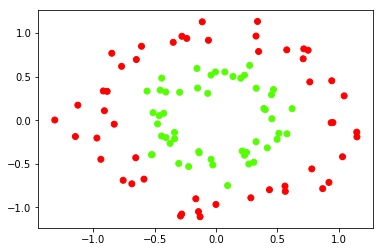

In [6]:
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y)

Take the first 50 examples for training and the rest for testing.

In [7]:
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

Import logistic regression and fit the model.

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Evaluate the logistic regression as we did before by ploting the decision surface and predictions on the test data.
We plot the training data as circles, colored with their true labels.
The test data is colored with their prediction and plotted as triangles.

Accuracy of logistic regression on test set: 0.4


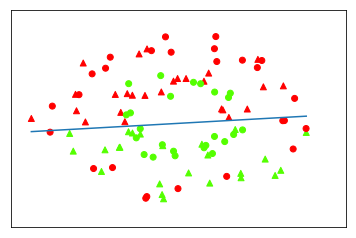

In [10]:
plt.prism()
from utility import plot_decision_boundary
y_pred_test = logreg.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plot_decision_boundary(logreg, X)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
print("Accuracy of logistic regression on test set:", logreg.score(X_test, y_test))

That doesn't look as good as before. Notice that all test points on the right of the line are red and all on the left are green. (as expected)

Now let us look at how K Nearest Neighbors works here. Let us import the classifier and create an object.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)    # we specify that this knn should always use 5 neighbors


In [12]:
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

Accuracy of KNN test set: 0.88


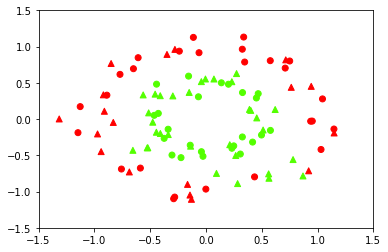

In [13]:
plt.prism() # gives us a nice color map
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
print("Accuracy of KNN test set:", knn.score(X_test, y_test))

This looks much better, which is also reflected by the test set score. You can try to change $k$ to make the prediction better.



MNIST
-----
We'll now have a look at MNIST again.

In [14]:
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
mnist = fetch_mldata("MNIST original")
X_digits, y_digits = mnist.data, mnist.target
X_digits, y_digits = shuffle(X_digits, y_digits)

This time we use all classes, but only a small training set (because KNN usually takes a while).
To do model selection, we also create a valdation set to adjust $k$.

In [15]:
X_digits_train = X_digits[:1000]
y_digits_train = y_digits[:1000]
X_digits_valid = X_digits[1000:2000]
y_digits_valid = y_digits[1000:2000]
X_digits_test = X_digits[2000:3000]
y_digits_test = y_digits[2000:3000]

Now let us fit the model. That actually just remembers the dataset. Then we will evaluate on the validation set.

This time we choose $k=20$.
You can find a good value later.


In [17]:
knn_digits = KNeighborsClassifier(n_neighbors=20)
knn_digits.fit(X_digits_train, y_digits_train)
print("KNN validation accuracy on MNIST digits: ", knn_digits.score(X_digits_valid, y_digits_valid))


KNN validation accuracy on MNIST digits:  0.84


After you found a good value of $k$, you can evaluate again on the test set (only do this once to have a meaningful result!)

In [13]:
print "KNN test accuracy on MNIST digits: ", knn_digits.score(X_digits_test, y_digits_test)

KNN test accuracy on MNIST digits:  0.857


To get a better understanding of the classifier, let us take a closer look at some mistake that are done with $k=3$.

In [14]:
knn_digits = KNeighborsClassifier(n_neighbors=3)
knn_digits.fit(X_digits_train, y_digits_train)
y_digits_valid_pred = knn_digits.predict(X_digits_valid)

Get the neighbors of the validation data from the training data.

In [15]:
neighbors = knn_digits._tree.query(X_digits_valid, k=3)[1]

Not let's look at them. Let's start with an image where it worked. First plot the validation image itself, then three neighbors.

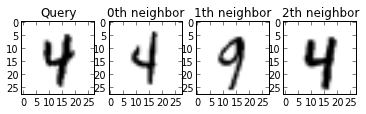

In [16]:
plt.rc("image", cmap="binary")  # this sets a black on white colormap
# plot X_digits_valid[0]
plt.subplot(1, 4, 1)
plt.imshow(X_digits_valid[0].reshape(28, 28))
plt.title("Query")
# plot three nearest neighbors from the training set
for i in [0, 1, 2]:
    plt.subplot(1, 4, 2 + i)
    plt.title("%dth neighbor" % i)
    plt.imshow(X_digits_train[neighbors[0, i]].reshape(28, 28)) 


Find out where we went wrong on the validation set, so we can have a look.

In [17]:
wrong = np.where(y_digits_valid_pred != y_digits_valid)[0]  # the != part gives a mask, the "where" gives us the indices
print "Wrong prediction on the following images: ", wrong



Wrong prediction on the following images:  [  8  13  20  30  37  38  44  48  63  88  92 101 104 105 109 126 137 140
 148 154 166 173 174 176 189 204 206 216 221 222 226 229 239 240 262 268
 277 291 294 309 311 313 314 333 334 341 344 357 364 365 371 377 392 395
 417 430 431 434 439 461 480 484 487 494 502 507 519 520 521 523 547 551
 562 564 577 578 590 599 604 622 631 639 643 659 669 673 683 692 696 710
 712 716 729 741 742 751 754 759 765 781 783 788 796 809 814 829 841 854
 867 897 903 911 917 918 927 957 958 972 973 976 986 987 995]


Now take one of these and visualize the 3 closest neighbors.
That will hopefully give us some insights into why there was an error.

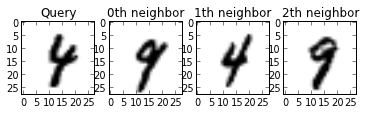

In [21]:
index = wrong[0]

plt.rc("image", cmap="binary")  # this sets a black on white colormap
# plot X_digits_valid[index]
plt.subplot(1, 4, 1)
plt.imshow(X_digits_valid[index].reshape(28, 28))
plt.title("Query")
# plot three nearest neighbors from the training set
for i in [0, 1, 2]:
    plt.subplot(1, 4, 2 + i)
    plt.title("%dth neighbor" % i)
    plt.imshow(X_digits_train[neighbors[index, i]].reshape(28, 28))

Playing with the notebook
=========================
1. Find a good $k$ for the simple circle dataset.
2. Find a good $k$ for the MNIST dataset using the validation set, then test once on the test set. How do the results on the validation set and test set differ?
3. How does the performance of KNN change when you change the size of the training set? (If you make it larger than 5000, you might have to wait a bit). Why does it change like this?